# 고객군별 매출 분석

- 일반적으로 기업에서 운영하는 e-commerce의 경우, 보통 비즈니스 모델을 계획할 때 B2B, B2C 등의 형태로 고객군을 구분하여 판매 전략을 정립.  
    → format column을 통해 고객군을 특정하여 구분할 수 있을 것으로 예상
- 고객군을 대분류로 지정하여 결제/환불, 기간/카테고리 등에 대한 세부 분석을 통해 전반적인 매출 현황 및 특징에 대해 파악해볼 예정.

## 전체 통계

### 고객군 구분 기준
- `format` column (온라인 강의의 기획 종류) 관련 데이터 살펴보기

In [ ]:
# 0. df 복사
df1 = df.iloc[:,:-14].copy()

# 'format' column의 unique value들을 count
print(df1['format'].value_counts())
print("-"*30)
print(f"→ 'format' column에는 총 {len(df1['format'].unique())}개의 고유값이 존재함을 확인")

올인원        46542
RED         3383
온라인 완주반     1671
하루10분컷      1371
스쿨          1036
B2B 온라인      984
스쿨 온라인       643
B2B          485
B2G          434
이벤트           89
아카이브          35
캠프            25
MBA           23
Name: format, dtype: int64
------------------------------
→ 'format' column에는 총 13개의 고유값이 존재함을 확인


### 고객군 분류
- 'format' column의 값에 포함된 특정 문자를 기준으로 B2B, B2G, B2C로 분류

In [ ]:
def classify(x):
    if 'B2B' in x :
        return "B2B"
    elif 'B2G' in x :
        return "B2G"
    else:
        return "B2C"

df1['고객군'] = df1['format'].map(classify)
df1.head()

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,...,is_programming,is_business,date,year,month,week,quarter,day_of_week,hour,고객군
0,2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,...,1,0,2021-03-28 15:21:43,2021,3,12,1,Sunday,15,B2C
1,4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,...,0,1,2021-03-28 15:21:54,2021,3,12,1,Sunday,15,B2C
2,8,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,...,0,0,2021-03-28 15:26:47,2021,3,12,1,Sunday,15,B2C
3,10,970671,469860,203644,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,...,0,0,2021-03-28 15:27:17,2021,3,12,1,Sunday,15,B2C
4,14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,...,1,0,2021-03-28 15:31:01,2021,3,12,1,Sunday,15,B2C


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56721 entries, 0 to 56722
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   56721 non-null  int64         
 1   id                      56721 non-null  int64         
 2   customer_id             56721 non-null  int64         
 3   course_id               56721 non-null  int64         
 4   type                    56721 non-null  object        
 5   state                   56721 non-null  object        
 6   course_title            56721 non-null  object        
 7   category_title          56721 non-null  object        
 8   format                  56721 non-null  object        
 9   completed_at            56721 non-null  datetime64[ns]
 10  transaction_amount      56721 non-null  int64         
 11  coupon_title            23761 non-null  object        
 12  coupon_discount_amount  23761 non-null  float6

### 전체 결제/환불 내역

In [ ]:
df_t = pd.pivot_table(data=df1, index=["type"], values=["transaction_amount"], aggfunc=["count", "sum"])
df_t.columns = ['결제 건수', '결제 총액']
df_t.index.names = ['결제 구분']
df_t = df_t.abs()
df_t

,결제 건수,결제 총액
결제 구분,,
PAYMENT,52900,8631806412
REFUND,3821,629723955


In [ ]:
df_ti = df_t.index
df_tvc = df_t['결제 건수'].values.reshape(1,-1)[0]
df_tvs = df_t['결제 총액'].values.reshape(1,-1)[0]

In [ ]:
fig = plt.figure(figsize=(16,10))

graph1 = fig.add_subplot(2,2,1)
df_t['결제 건수'].plot.pie(explode=[0,0.05],autopct='%1.2f%%',ax=graph1, colors =  ['#8EDADA','#D3F1F0'])
graph1.set_title('결제 건수 기준')
graph1.set_ylabel('')
plt.legend(df_ti, loc = 'best')

graph2 = fig.add_subplot(2,2,2)
bar2 = plt.bar(df_ti, df_tvc, color =  ['#8EDADA','#D3F1F0'])
graph2.set_title('결제 건수')

for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 12)

graph2.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))


graph3 = fig.add_subplot(2,2,3)
df_t['결제 총액'].plot.pie(explode=[0,0.05],autopct='%1.2f%%',ax=graph3, colors =  ['#168398','#35A7AF'])
graph3.set_title('결제 총액 기준')
graph3.set_ylabel('')

graph4 = fig.add_subplot(2,2,4)
bar4 = plt.bar(df_ti, df_tvs, color =  ['#168398','#35A7AF'])
graph4.set_title('결제 총액')

for rect in bar4:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 12)

graph4.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show(fig)

NameError: ignored

위의 그래프를 통해 결제/환불 금액과 결제/환불 건수의 비율이 유사함을 확인할 수 있습니다.

In [ ]:
all_payment = len(df1['type'])
payment_completed = len(df1[df1['type'] == 'PAYMENT'])
refund_completed = len(df1[df1['type'] == 'REFUND'])

print(f"전체 결제 건수는 {all_payment}건 입니다.")
print(f"전체 결제 완료 건수는 {payment_completed}건이며, 약 {round(payment_completed/all_payment * 100,2)}% 입니다.")
print(f"전체 환불 완료 건수는 {refund_completed}건이며, 약 {round(refund_completed/all_payment * 100,2)}% 입니다.")

전체 결제 건수는 56721건 입니다.
전체 결제 완료 건수는 52900건이며, 약 93.26% 입니다.
전체 환불 완료 건수는 3821건이며, 약 6.74% 입니다.


#### 고객군별 결제/환불 내역
- 위에서 분류한 고객군을 기준으로 type column의 데이터 값이 PAYMENT/REFUND인지에 따라 각각 결제 및 환불로 구분하여 건수, 합계액, 평균액을 별도 테이블로 생성

- 정상 결제 완료 건에 대한 데이터 확인을 위한 처리

In [ ]:
# 각 고객사별 결제 건수, 합계액, 평균 결제액 확인
df_bp = pd.pivot_table(data=df1[df1['type'] == 'PAYMENT'], index=['고객군'], values=['transaction_amount'], aggfunc=['count', 'sum', 'mean'])
df_bp.columns = ['건수', '합계액', '평균']
df_bp

,건수,합계액,평균
고객군,,,
B2B,1373,1988581099,1448347.49
B2C,51178,6611379013,129184.01
B2G,349,31846300,91250.14


In [ ]:
# 각 고객사별 환불 건수, 합계액, 평균 환불액 확인
df_br = pd.pivot_table(data=df1[df1['type'] == 'REFUND'], index=['고객군'], values=['transaction_amount'], aggfunc=['count', 'sum', 'mean'])
df_br= df_br.abs()
df_br.columns = ['건수', '합계액', '평균']
df_br

,건수,합계액,평균
고객군,,,
B2B,96,7084990,73801.98
B2C,3640,619713965,170251.09
B2G,85,2925000,34411.76


#### 전체 순매출 내역
- 위의 결제/환불 내역 테이블의 개별 데이터 값의 차이를 구해 순매출액을 확인하였으며, 고객군별로 각각의 데이터 값을 비교

In [ ]:
# 각 고객사별 순매출 건수, 합계액, 평균 매출액 확인
df_b = df_bp.loc[:,['건수','합계액']] - df_br.loc[:,['건수','합계액']]
df_b['평균'] = df_b['합계액'] / df_b['건수']
df_b.columns = ['건수', '합계액', '평균']
df_b

,건수,합계액,평균
고객군,,,
B2B,1277,1981496109,1551680.59
B2C,47538,5991665048,126039.49
B2G,264,28921300,109550.38


In [ ]:
BMI = df_b.index
BMCV = df_b['건수'].values.reshape(1,-1)[0]
BMSV = df_b['합계액'].values.reshape(1,-1)[0].round(2)
BMMV = df_b['평균'].values.reshape(1,-1)[0].round(2)

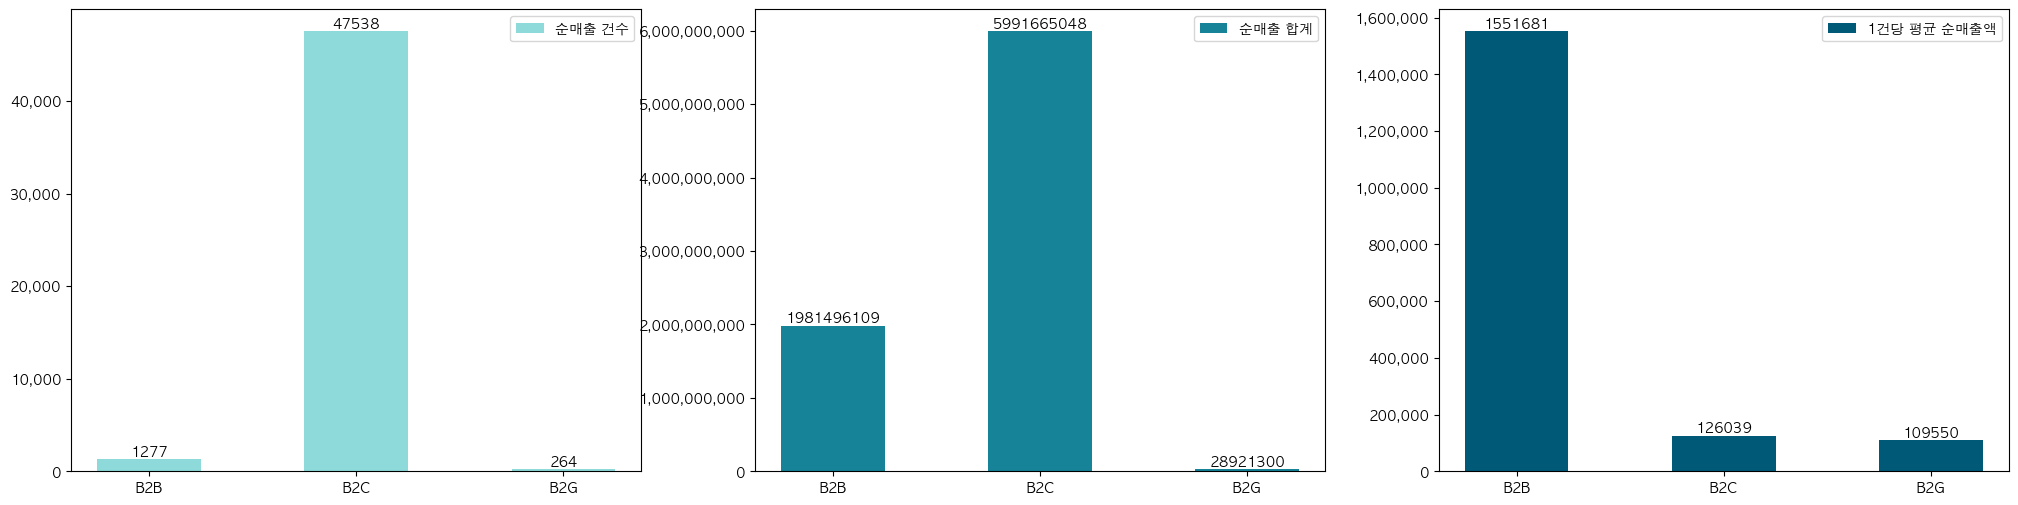

In [ ]:
fig1 = plt.figure(figsize=(25,6))

spec = grs.GridSpec(ncols=3, nrows=1, width_ratios=[1, 1, 1])

# 1번째 barplot
ax1 = fig1.add_subplot(spec[0])
bar1 = plt.bar(BMI, BMCV, width = 0.5, color = '#8EDADA')
plt.legend(labels =['순매출 건수'], fontsize = 15, loc='best')
# plt.ylabel("판매량")
## 그래프에 숫자 삽입
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 12)

ax1.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

# 2번째 barplot
ax2 = fig1.add_subplot(spec[1])
bar2 = plt.bar(BMI, BMSV, width = 0.5, color = '#168398')
plt.legend(labels =['순매출 합계'], fontsize = 15, loc='best')
# plt.ylabel("판매 총액")
## 그래프에 숫자 삽입
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 12)

ax2.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))


# 3번째 barplot
ax3 = fig1.add_subplot(spec[2])
bar3 = plt.bar(BMI, BMMV, width = 0.5, color = '#005977')
plt.legend(labels =['1건당 평균 순매출액'], fontsize = 15, loc='best')
# plt.ylabel("1건당 평균 판매액")
## 그래프에 숫자 삽입
for rect in bar3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 12)

ax3.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

# Matplotlib : 축의 숫자를 천 단위로 표시 --> https://codesample-factory.tistory.com/1231   ,    https://zephyrus1111.tistory.com/178
# Matplotlib : plt 선, 바 그래프 위에 숫자, 값 표시하기 --> https://jimmy-ai.tistory.com/24

- `판매건`으로 보았을 때에는 <u>B2C > B2B > B2G</u> 순서 였으나, `1건당 판매액`을 기준으로는 <u>B2B > B2C > B2G</u> 순서임을 확인
- `판매건수` 혹은 `판매액`을 기준으로는 <u>B2G로의 판매가 상당히 저조</u>해 보이지만, `1건당 판매액`을 기준으로 보았을 때, <u>B2C에 비해 70%정도 되는 것</u>으로 파악됨.  
→ 추가적인 데이터를 살펴 <u>해당 채널을 통한 판매에 대한 마케팅의 증대 여부를 결정</u>해야 할 것으로 판단됨.  
   - ex) 마케팅에 소모되는 비용, 시간 등

### 금액대 구분 
- 금액대별 구역을 구분하여 고객군별로 금액대에 대한 결제/환불 내역확인

In [ ]:
df2 = df1.copy()

def classify(x):
    if -10000000 < x <= -1000000 :
        return "환불 4. 백만원대"
    if -1000000 < x <= -100000 :
        return "환불 3. 십만원대"  
    if -100000 < x <= -10000 :
        return "환불 2. 만원대"    
    if -10000 < x < 0 :
        return "환불 1. 만원 미만"       
    elif x ==0 :
        return '매출 1. 공-짜'
    elif 0< x < 10000 :
        return "매출 2. 만원 미만"
    elif 10000 <= x < 100000:
        return "매출 3. 만원대"
    elif 100000 <= x < 1000000:
        return "매출 4. 십만원대"
    elif 1000000 <= x < 10000000:
        return "매출 5. 백만원대"
    else:
        return "매출 6. 천만원 이상"

df1['금액대'] = df1['transaction_amount'].map(classify)
df1.head(10)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,고객군,sale_time,금액대
14,966450.00,476218.00,203531.00,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 데이터 분석 툴,데이터사이언스,올인원,2021-03-29 09:06:13,70500.00,...,10000.00,80500.00,80500.00,NaN,VBANK,데이터분석,2021-02-10 00:00:00,B2C,21-03,매출 3. 만원대
16,968259.00,476562.00,203787.00,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 디자인 툴,디자인,올인원,2021-03-29 20:15:59,140000.00,...,30000.00,170000.00,170000.00,NaN,VBANK,디자인툴,2020-12-24 11:00:00,B2C,21-03,매출 4. 십만원대
18,970132.00,459700.00,204082.00,PAYMENT,COMPLETED,밑바닥부터 배포까지 클론코딩 온라인 완주반 1기,프로그래밍,온라인 완주반,2021-03-28 23:20:51,410000.00,...,50000.00,460000.00,460000.00,NaN,VBANK,NaN,2021-01-28 00:00:00,B2C,21-03,매출 4. 십만원대
19,970247.00,477780.00,203531.00,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 데이터 분석 툴,데이터사이언스,올인원,2021-03-28 18:28:46,70500.00,...,10000.00,80500.00,80500.00,NaN,VBANK,데이터분석,2021-02-10 00:00:00,B2C,21-03,매출 3. 만원대
20,970507.00,477956.00,203535.00,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 PPT 제작/디자인,업무 생산성,올인원,2021-03-30 10:44:28,99000.00,...,NaN,99000.00,99000.00,NaN,VBANK,PPT/보고서,2021-03-10 00:00:00,B2C,21-03,매출 3. 만원대
21,970586.00,477997.00,200681.00,PAYMENT,COMPLETED,올인원 패키지 : 머신러닝과 데이터분석 A-Z,데이터사이언스,올인원,2021-03-30 13:08:40,103000.00,...,20000.00,123000.00,123000.00,NaN,VBANK,머신러닝,2019-05-17 00:00:00,B2C,21-03,매출 4. 십만원대
27,970657.00,72297.00,204246.00,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810.00,...,19090.00,190900.00,190900.00,NaN,CARD,NaN,2021-03-04 00:00:00,B2C,21-03,매출 4. 십만원대
28,970658.00,478028.00,201797.00,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500.00,...,20000.00,117500.00,117500.00,NaN,CARD,PPT/보고서,2019-11-14 00:00:00,B2C,21-03,매출 3. 만원대
32,970669.00,478033.00,203178.00,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000.00,...,20000.00,116000.00,116000.00,NaN,CARD,영상 편집,2020-12-02 00:00:00,B2C,21-03,매출 3. 만원대
34,970671.00,469860.00,203644.00,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000.00,...,NaN,263000.00,263000.00,NaN,CARD,NaN,2020-11-27 00:00:00,B2C,21-03,매출 4. 십만원대


#### 금액대별 결제/환불 내역

In [ ]:
# 금액대별 결제 내역 확인

df_br = pd.pivot_table(data=df1, index=['금액대'], values=['transaction_amount'], aggfunc=['count', 'sum', 'mean'])
df_br.columns = ['건수', '합계액', '평균']
df_br.iloc[:5,:]

,건수,합계액,평균
금액대,,,
매출 1. 공-짜,4733,0.00,0.00
매출 2. 만원 미만,1005,6254375.00,6223.26
매출 3. 만원대,13196,863462737.00,65433.67
매출 4. 십만원대,33534,5988685356.00,178585.48
매출 5. 백만원대,408,890341079.00,2182208.53


In [ ]:
# 금액대별 환불 내역 확인

df_br.iloc[6:,:]

,건수,합계액,평균
금액대,,,
환불 1. 만원 미만,18,-157155.00,-8730.83
환불 2. 만원대,1114,-78884620.00,-70812.05
환불 3. 십만원대,2600,-497949774.00,-191519.14
환불 4. 백만원대,27,-48102406.00,-1781570.59


In [ ]:
dfs = df1[df1['금액대'].str.contains('매출')]
dfs.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,고객군,sale_time,금액대
14,966450.00,476218.00,203531.00,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 데이터 분석 툴,데이터사이언스,올인원,2021-03-29 09:06:13,70500.00,...,10000.00,80500.00,80500.00,NaN,VBANK,데이터분석,2021-02-10 00:00:00,B2C,21-03,매출 3. 만원대
16,968259.00,476562.00,203787.00,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 디자인 툴,디자인,올인원,2021-03-29 20:15:59,140000.00,...,30000.00,170000.00,170000.00,NaN,VBANK,디자인툴,2020-12-24 11:00:00,B2C,21-03,매출 4. 십만원대
18,970132.00,459700.00,204082.00,PAYMENT,COMPLETED,밑바닥부터 배포까지 클론코딩 온라인 완주반 1기,프로그래밍,온라인 완주반,2021-03-28 23:20:51,410000.00,...,50000.00,460000.00,460000.00,NaN,VBANK,NaN,2021-01-28 00:00:00,B2C,21-03,매출 4. 십만원대
19,970247.00,477780.00,203531.00,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 데이터 분석 툴,데이터사이언스,올인원,2021-03-28 18:28:46,70500.00,...,10000.00,80500.00,80500.00,NaN,VBANK,데이터분석,2021-02-10 00:00:00,B2C,21-03,매출 3. 만원대
20,970507.00,477956.00,203535.00,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 PPT 제작/디자인,업무 생산성,올인원,2021-03-30 10:44:28,99000.00,...,NaN,99000.00,99000.00,NaN,VBANK,PPT/보고서,2021-03-10 00:00:00,B2C,21-03,매출 3. 만원대


#### 고객군별 금액대별 결제/환불 내역

In [ ]:
# 고객군별 금액대별 결제 내역

df_BM_C = pd.pivot_table(data=dfs, index=['고객군', '금액대'], values=['transaction_amount'], aggfunc=['count', 'sum', 'mean'])
# df_BM_C.index.names = ['고객군', '강의 대분류']
# df_BM_C.columns=['매출 합계액']
df_BM_C.columns = ['건수', '합계액', '평균']
df_BM_C


# df_br = pd.pivot_table(data=df2, index=['고객군', '금액대'], values=['transaction_amount'], aggfunc=['count', 'sum', 'mean'])
# df_br.columns = ['건수', '합계액', '평균']

건수           합계액          평균
고객군 금액대                                          
B2B 매출 1. 공-짜         4          0.00        0.00
    매출 3. 만원대       351   11352200.00    32342.45
    매출 4. 십만원대      653  342436155.00   524404.53
    매출 5. 백만원대      329  771729879.00  2345683.52
    매출 6. 천만원 이상     36  863062865.00 23973968.47
B2C 매출 1. 공-짜      4691          0.00        0.00
    매출 2. 만원 미만    1005    6254375.00     6223.26
    매출 3. 만원대     12543  842461537.00    67165.87
    매출 4. 십만원대    32873 5644051901.00   171692.63
    매출 5. 백만원대       79  118611200.00  1501407.59
    매출 6. 천만원 이상     49   -4630000.00   -94489.80
B2G 매출 1. 공-짜        38          0.00        0.00
    매출 3. 만원대       302    9649000.00    31950.33
    매출 4. 십만원대        8    2197300.00   274662.50
    매출 6. 천만원 이상      1   20000000.00 20000000.00

In [ ]:
dfr = df1[df1['금액대'].str.contains('환불')]
dfr.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,고객군,sale_time,금액대
676,972377.00,444760.00,204122.00,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000.00,...,NaN,404000.00,404000.00,NaN,VBANK,NaN,NaT,B2C,21-03,환불 3. 십만원대
678,972381.00,472666.00,203178.00,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000.00,...,NaN,116000.00,116000.00,NaN,CARD,영상 편집,2020-12-02,B2C,21-03,환불 2. 만원대
692,972409.00,447177.00,203989.00,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000.00,...,NaN,89000.00,89000.00,NaN,CARD,일러스트,2021-02-19,B2C,21-03,환불 2. 만원대
699,972422.00,373915.00,204264.00,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000.00,...,NaN,340000.00,340000.00,NaN,VBANK,NaN,2021-03-08,B2C,21-03,환불 3. 십만원대
702,972436.00,456086.00,NaN,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000.00,...,NaN,299000.00,299000.00,NaN,CARD,NaN,NaT,B2C,21-03,환불 3. 십만원대


In [ ]:
# 고객군별 금액대별 환불 내역

df_BM_C = pd.pivot_table(data=dfr, index=['고객군', '금액대'], values=['transaction_amount'], aggfunc=['count', 'sum', 'mean'])
df_BM_C.columns = ['건수', '합계액', '평균']
df_BM_C

건수           합계액          평균
고객군 금액대                                        
B2B 환불 2. 만원대      87   -2756660.00   -31685.75
    환불 3. 십만원대      8   -2528330.00  -316041.25
    환불 4. 백만원대      1   -1800000.00 -1800000.00
B2C 환불 1. 만원 미만    18    -157155.00    -8730.83
    환불 2. 만원대     943  -73332960.00   -77765.60
    환불 3. 십만원대   2591 -495291444.00  -191158.41
    환불 4. 백만원대     26  -46302406.00 -1780861.77
B2G 환불 2. 만원대      84   -2795000.00   -33273.81
    환불 3. 십만원대      1    -130000.00  -130000.00

### 월별 매출
- `completed_at` column : 온라인 강의의 기획 종류

In [ ]:
# 결제 완료 시점 데이터 기준으로 년월(yyyy-mm)을 추출하여 별도 column으로 구분
df1['sale_time'] = df1['completed_at'].apply(lambda x : str(x)[2:7])
df1.head()

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,...,is_business,date,year,month,week,quarter,day_of_week,hour,고객군,sale_time
0,2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,...,0,2021-03-28 15:21:43,2021,3,12,1,Sunday,15,B2C,21-03
1,4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,...,1,2021-03-28 15:21:54,2021,3,12,1,Sunday,15,B2C,21-03
2,8,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,...,0,2021-03-28 15:26:47,2021,3,12,1,Sunday,15,B2C,21-03
3,10,970671,469860,203644,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,...,0,2021-03-28 15:27:17,2021,3,12,1,Sunday,15,B2C,21-03
4,14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,...,0,2021-03-28 15:31:01,2021,3,12,1,Sunday,15,B2C,21-03


In [ ]:
# 월별 매출 집계

how = {
    'transaction_amount':np.sum
}

df_S = df1.groupby(['sale_time']).agg(how)
df_S = df_S.rename(columns={ 'transaction_amount':'매출 합계액'})
df_S.index.names = ['판매 시기']
df_S

,매출 합계액
판매 시기,
21-03,221407144
21-04,1269062551
21-05,1129277933
21-06,1327552170
21-07,1549957390
21-08,1468471087
21-09,1036354182


In [ ]:
ST = df_S.index
SV= df_S.values.reshape(1,-1)[0]

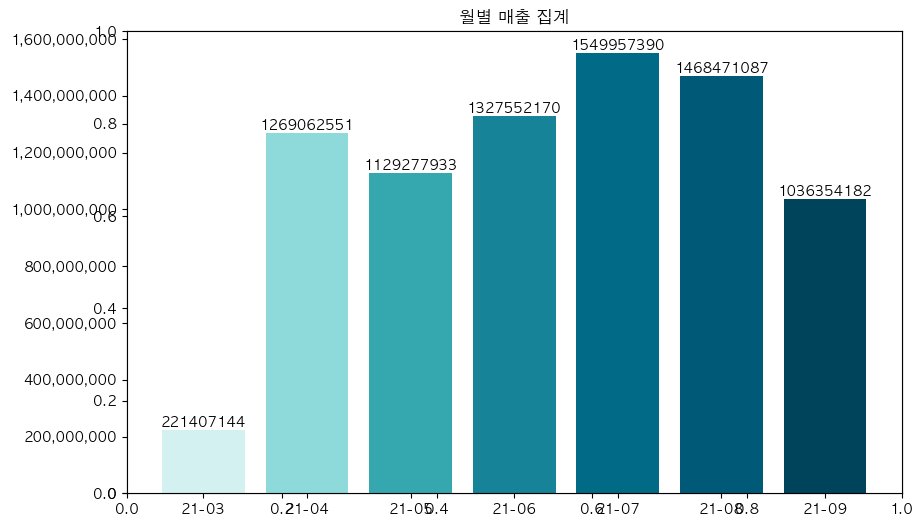

In [ ]:
fig2 = plt.figure(figsize=(10,6))
plt.title('월별 매출 집계')
ax4 = fig2.add_subplot(1, 1, 1)
bar4= plt.bar(ST, SV, color = ['#D3F1F0', '#8EDADA', '#35A7AF', '#168398', '#006A87', '#005977', '#00445C'])

for rect in bar4:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 10)

ax4.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

- 주어진 데이터의 경우, 3월28일부터 9월25일까지의 것이기 때문에 3월과 9월 제외하고 4월부터 8월까지의 매출에 초점을 두고 살펴봄.
- 5월에 다소 감소하였으나 그 이후 점차 매출이 늘었으며 7월 최고 매출 달성 후 8월에는 약간 감소.

#### 고객군별 월별 매출

In [ ]:
# 고객군별 월별 매출 집계


how = {
    'transaction_amount':np.sum
}

df_BM_S = df1.groupby(['고객군', 'sale_time']).agg(how)
df_BM_S = df_BM_S.rename(columns={'transaction_amount':'매출 합계액'})
df_BM_S

매출 합계액
고객군 sale_time            
B2B 21-03        28926150
    21-04       399116216
    21-05       231239729
    21-06       351726650
    21-07       422510829
    21-08       291946505
    21-09       256030030
B2C 21-03       192480994
    21-04       869946335
    21-05       898038204
    21-06       975825520
    21-07      1126587271
    21-08      1151990772
    21-09       776795952
B2G 21-07          859290
    21-08        24533810
    21-09         3528200

In [ ]:
BMC = df_BM_S.index.get_level_values(0).drop_duplicates()
BMT = df_BM_S.index.get_level_values(1).drop_duplicates()
B2B_V= df_BM_S.loc['B2B'].values.reshape(1,-1)[0]
B2C_V= df_BM_S.loc['B2C'].values.reshape(1,-1)[0]
B2G_V= np.append(np.array([0,0,0,0]), df_BM_S.loc['B2G'].values.reshape(1,-1)[0])

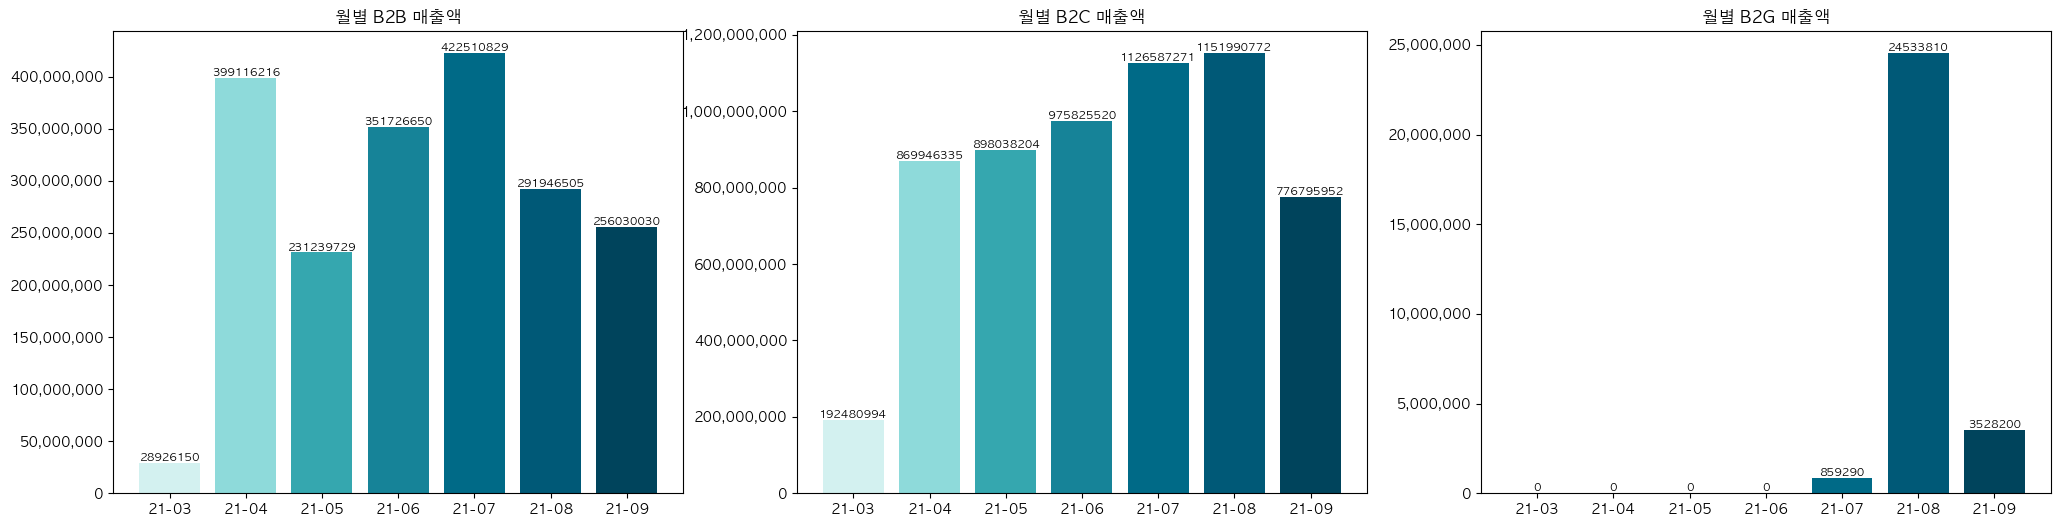

In [ ]:
fig3 = plt.figure(figsize=(25,6))

ax5 = plt.subplot(1, 3, 1)
plt.title("월별 B2B 매출액")
bar5 = plt.bar(BMT, B2B_V, color = ['#D3F1F0', '#8EDADA', '#35A7AF', '#168398', '#006A87', '#005977', '#00445C'])

for rect in bar5:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 8)

ax5.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

ax6 = plt.subplot(1, 3, 2)
plt.title("월별 B2C 매출액")
bar6 = plt.bar(BMT, B2C_V, color = ['#D3F1F0', '#8EDADA', '#35A7AF', '#168398', '#006A87', '#005977', '#00445C'])

for rect in bar6:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 8)

ax6.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

ax7 = plt.subplot(1, 3, 3)
plt.title("월별 B2G 매출액")
bar7 = plt.bar(BMT, B2G_V, color = ['#D3F1F0', '#8EDADA', '#35A7AF', '#168398', '#006A87', '#005977', '#00445C'])

for rect in bar7:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 8)

ax7.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

- 해당 그래프를 통해 B2B 유형의 경우 매출 증감 추이가 전체 매출과 유사함을, B2C 유형은 꾸준히 매출이 증가하고 있음을, B2G 유형은 7월부터 신규 매출이 발생하여 7월 대비 8월에 매출이 큰 폭으로 상승하였음을 확인

### 카테고리별 매출
- `category_title` column : 대분류

In [ ]:
df1['category_title'].value_counts()

프로그래밍      19063
데이터사이언스     7359
업무 생산성      6968
디자인         6174
영상/3D       5519
마케팅         5077
부동산/금융      3012
투자/재테크      1597
크리에이티브       954
교육           932
비즈니스          24
지식콘텐츠         23
파이낸스          19
Name: category_title, dtype: int64

In [ ]:
# 카테고리별 매출 집계

df_C = df1.groupby(['category_title']).agg(how)
df_C = df_C.rename(columns={ 'transaction_amount':'매출 합계액'})
df_C.index.names = ['강의 대분류']
df_C

,매출 합계액
강의 대분류,
교육,1160325545
데이터사이언스,1522882099
디자인,663198168
마케팅,734605824
부동산/금융,475644434
비즈니스,5389865
업무 생산성,595029425
영상/3D,544706205
지식콘텐츠,4970000


In [ ]:
CT = df_C.index
CV = df_C.values.reshape(1,-1)[0]

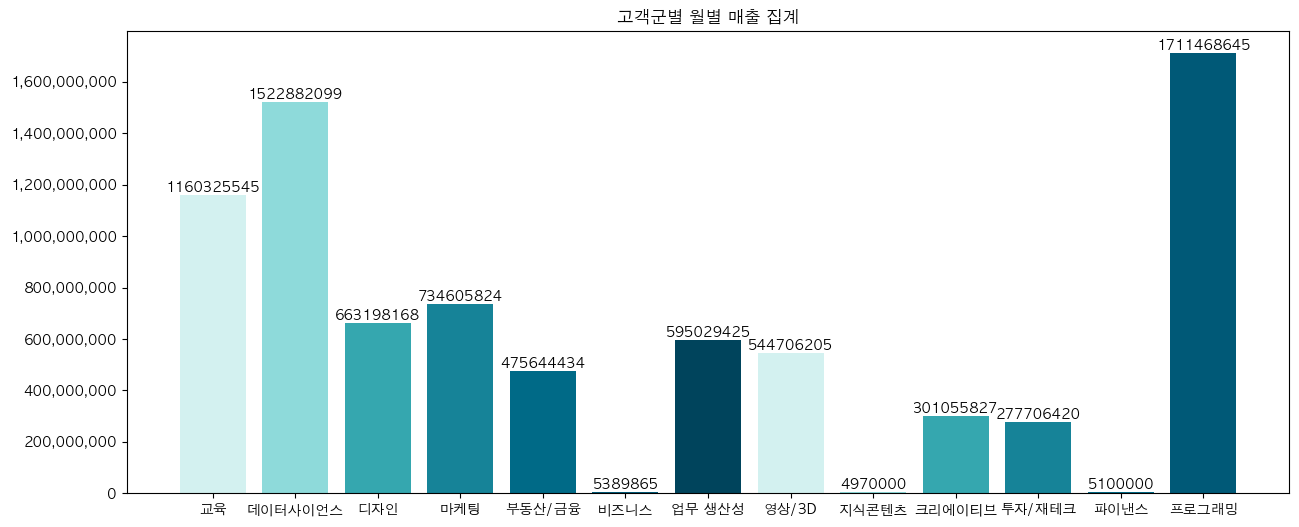

In [ ]:
fig4 = plt.figure(figsize=(15,6))

ax8 = fig4.add_subplot(1, 1, 1)
plt.title('고객군별 월별 매출 집계')
bar8 = plt.bar(CT, CV, color = ['#D3F1F0', '#8EDADA', '#35A7AF', '#168398', '#006A87', '#005977', '#00445C'])

ax8.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

for rect in bar8:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 10)

plt.show()

- 순서대로 프로그래밍, 데이터사이언스, 교육이 Top 3를 구성하고 있으며 그 외 전반적인 매출 정도를 파악 가능.

#### 고객군별 카테고리별 매출

In [ ]:
# 고객군별 카테고리별 매출 집계

df_BM_C = df1.groupby(['고객군', 'category_title']).agg(how)
df_BM_C.index.names = ['고객군', '강의 대분류']
df_BM_C.columns=['매출 합계액']
df_BM_C

매출 합계액
고객군 강의 대분류             
B2B 교육       1160325545
    데이터사이언스   541879554
    마케팅       126982500
    부동산/금융      2177500
    비즈니스         360000
    업무 생산성     22505500
    크리에이티브     63073500
    파이낸스         480000
    프로그래밍      63712010
B2C 데이터사이언스   981002545
    디자인       663198168
    마케팅       587623324
    부동산/금융    473466934
    비즈니스        5029865
    업무 생산성    572523925
    영상/3D     544706205
    지식콘텐츠       4970000
    크리에이티브    237982327
    투자/재테크    277706420
    파이낸스        4620000
    프로그래밍    1638835335
B2G 마케팅        20000000
    프로그래밍       8921300

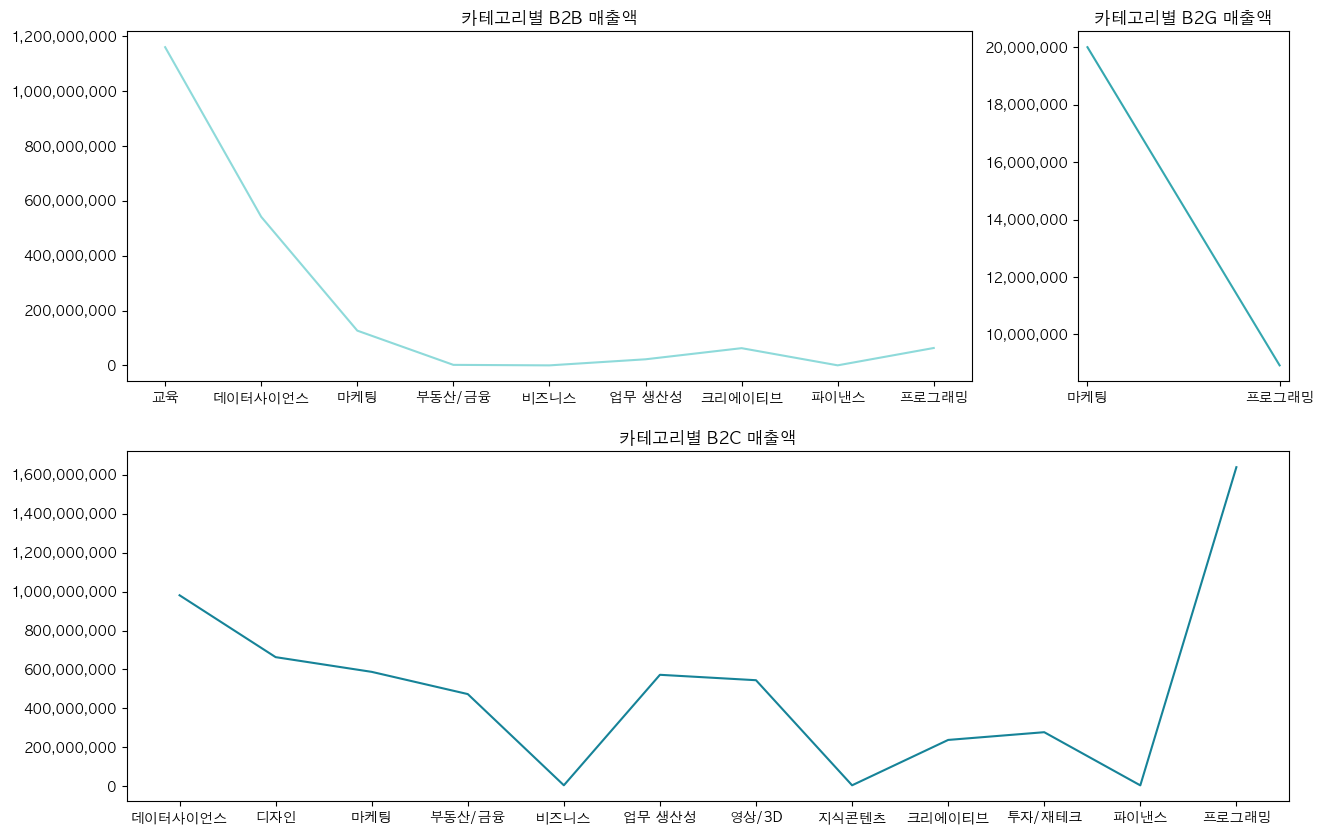

In [ ]:
fig5 = plt.figure(figsize=(15,10))

spec = grs.GridSpec(ncols=2, nrows=2, width_ratios=[4, 1])

ax9 = fig5.add_subplot(spec[0])
plt.title("카테고리별 B2B 매출액")
plt.plot(df_BM_C.loc['B2B'], color = '#8EDADA')

ax9.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

ax10 = fig5.add_subplot(spec[2:4])
plt.title("카테고리별 B2C 매출액")
plt.plot(df_BM_C.loc['B2C'], color = '#168398')

ax10.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

ax11 = fig5.add_subplot(spec[1])
plt.title("카테고리별 B2G 매출액")
plt.plot(df_BM_C.loc['B2G'], color = '#35A7AF')

ax11.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

- B2B의 경우, 전체 카테고리의 매출 현황과는 다르게 교육이 압도적으로 높은 매출을 차지하고 있음  
- 반면 B2G의 경우 매출의 대부분이 마케팅 카테고리로 구성  
- B2C의 카테고리별 매출은 교육이 없다는 것을 제외한다면 전체적인 카테고리별 매출의 추이와 일치함을 파악

In [ ]:
BMC = df_BM_C.index.get_level_values(0).drop_duplicates()
BMT = df_BM_C.index.get_level_values(1).drop_duplicates()

B2B_I = df_BM_C.loc['B2B'].index
B2B_V= df_BM_C.loc['B2B'].values.reshape(1,-1)[0]
B2C_I = df_BM_C.loc['B2C'].index
B2C_V= df_BM_C.loc['B2C'].values.reshape(1,-1)[0]
B2G_I = df_BM_C.loc['B2G'].index
B2G_V= df_BM_C.loc['B2G'].values.reshape(1,-1)[0]

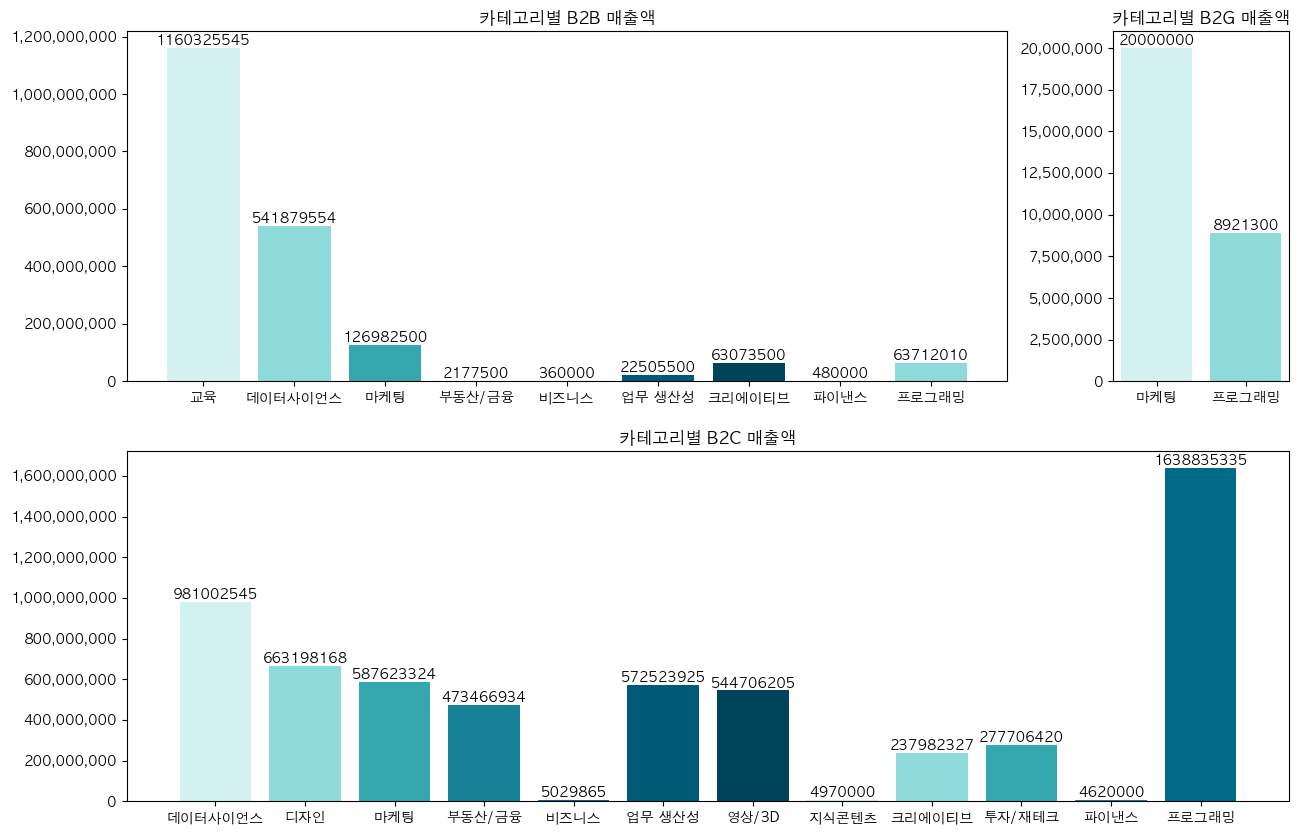

In [ ]:
fig5 = plt.figure(figsize=(15,10))

spec = grs.GridSpec(ncols=2, nrows=2, width_ratios=[5, 1])

ax9 = fig5.add_subplot(spec[0])
plt.title("카테고리별 B2B 매출액")
bar9 = plt.bar(B2B_I, B2B_V, color = ['#D3F1F0', '#8EDADA', '#35A7AF', '#168398', '#006A87', '#005977', '#00445C'])

ax9.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

for rect in bar9:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 10)

ax10 = fig5.add_subplot(spec[2:4])
plt.title("카테고리별 B2C 매출액")
bar10 = plt.bar(B2C_I, B2C_V, color = ['#D3F1F0', '#8EDADA', '#35A7AF', '#168398', '#006A87', '#005977', '#00445C'])

ax10.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

for rect in bar10:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 10)

ax11 = fig5.add_subplot(spec[1])
plt.title("카테고리별 B2G 매출액")
bar11 = plt.bar(B2G_I, B2G_V, color = ['#D3F1F0', '#8EDADA', '#35A7AF', '#168398', '#006A87', '#005977', '#00445C'])

ax11.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

for rect in bar11:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 10)

plt.show()

### 월별 카테고리별 매출

In [ ]:
# 월별 카테고리별 매출 집계 (1)

df_BM_SC = df1.groupby(['sale_time', 'category_title']).agg(how)
df_BM_SC.index.names = ['판매 시기', '강의 대분류']
df_BM_SC.columns=['매출 합계액']
df_BM_SC

매출 합계액
판매 시기 강의 대분류            
21-03 교육        27606150
      데이터사이언스   32636500
      디자인       21436835
      마케팅       15819867
      부동산/금융    19622100
...                  ...
21-09 지식콘텐츠       239000
      크리에이티브    31120000
      투자/재테크    40731367
      파이낸스       2310000
      프로그래밍    213608729

[80 rows x 1 columns]

In [ ]:
df_BM_SC_I03 = df_BM_SC.loc['21-03'].index
df_BM_SC_I04 = df_BM_SC.loc['21-04'].index
df_BM_SC_I05 = df_BM_SC.loc['21-05'].index
df_BM_SC_I06 = df_BM_SC.loc['21-06'].index
df_BM_SC_I07 = df_BM_SC.loc['21-07'].index
df_BM_SC_I08 = df_BM_SC.loc['21-08'].index
df_BM_SC_I09 = df_BM_SC.loc['21-09'].index
df_BM_SC_v03 = df_BM_SC.loc['21-03'].values.reshape(1,-1)[0]
df_BM_SC_v04 = df_BM_SC.loc['21-04'].values.reshape(1,-1)[0]
df_BM_SC_v05 = df_BM_SC.loc['21-05'].values.reshape(1,-1)[0]
df_BM_SC_v06 = df_BM_SC.loc['21-06'].values.reshape(1,-1)[0]
df_BM_SC_v07 = df_BM_SC.loc['21-07'].values.reshape(1,-1)[0]
df_BM_SC_v08 = df_BM_SC.loc['21-08'].values.reshape(1,-1)[0]
df_BM_SC_v09 = df_BM_SC.loc['21-09'].values.reshape(1,-1)[0]

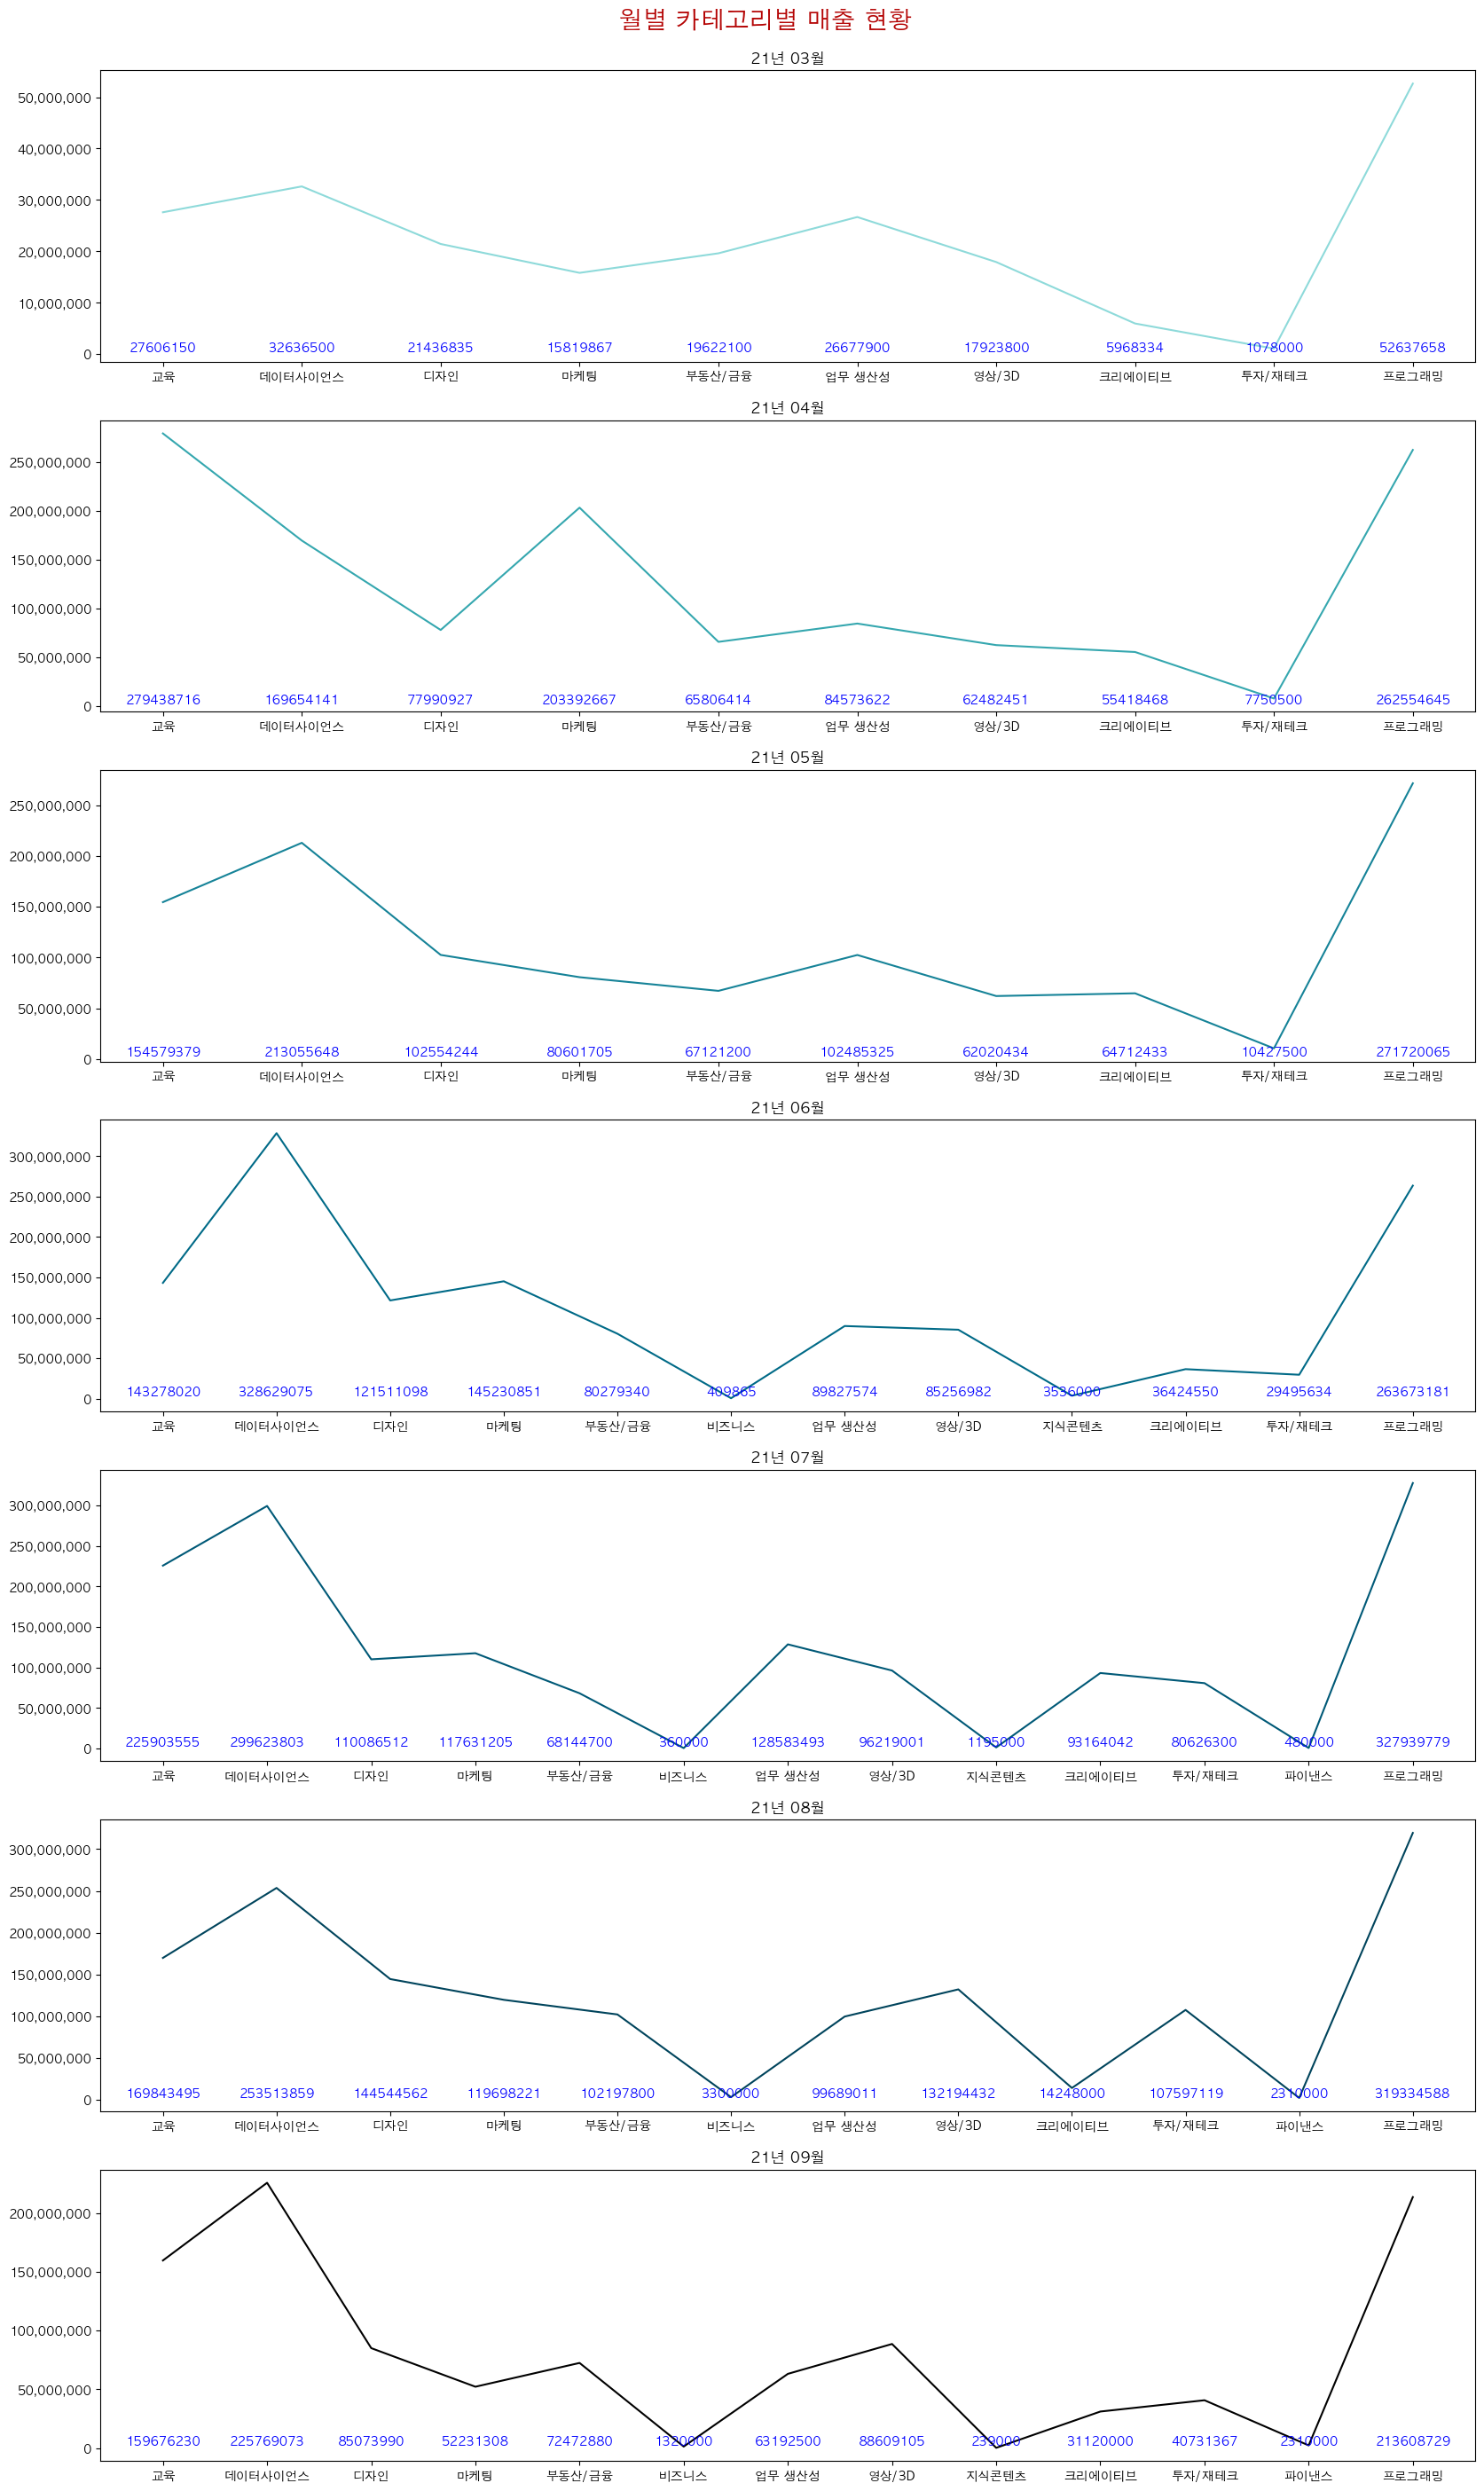

In [ ]:
fig6  = plt.figure(figsize=(20,35))

ax12 = fig6.add_subplot(7, 1, 1)
plt.title("21년 03월")
bar12 = plt.plot(df_BM_SC.loc['21-03'], color="#8EDADA")

ax12.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

# for i in range(len(df_BM_SC_I03)):
for i in [1,9]:
    height = df_BM_SC_v03[i]
    plt.text(df_BM_SC_I03[i], 0.05, '%.0f' %height, ha='center', va='bottom', size = 10, color = '#0000ff' )

ax13 = fig6.add_subplot(7, 1, 2)
plt.title("21년 04월")
bar13 = plt.plot(df_BM_SC.loc['21-04'], color="#35A7AF")

ax13.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

# for i in range(len(df_BM_SC_I04)):
for i in [0,9]:
    height = df_BM_SC_v04[i]
    plt.text(df_BM_SC_I04[i], 0.05, '%.0f' %height, ha='center', va='bottom', size = 10, color = '#0000ff' )

ax14 = fig6.add_subplot(7, 1, 3)
plt.title("21년 05월")
bar14 = plt.plot(df_BM_SC.loc['21-05'], color="#168398")

ax14.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

# for i in range(len(df_BM_SC_I05)):
for i in [1,9]:    
    height = df_BM_SC_v05[i]
    plt.text(df_BM_SC_I05[i], 0.05, '%.0f' %height, ha='center', va='bottom', size = 10, color = '#0000ff' )

ax15 = fig6.add_subplot(7, 1, 4)
plt.title("21년 06월")
bar15 = plt.plot(df_BM_SC.loc['21-06'], color="#006A87")

ax15.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

# for i in range(len(df_BM_SC_I06)):
for i in [1,11]:
    height = df_BM_SC_v06[i]
    plt.text(df_BM_SC_I06[i], 0.05, '%.0f' %height, ha='center', va='bottom', size = 10, color = '#0000ff' )

ax16 = fig6.add_subplot(7, 1, 5)
plt.title("21년 07월")
bar16 = plt.plot(df_BM_SC.loc['21-07'], color="#005977")

ax16.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

# for i in range(len(df_BM_SC_I07)):
for i in [1,12]:
    height = df_BM_SC_v07[i]
    plt.text(df_BM_SC_I07[i], 0.05, '%.0f' %height, ha='center', va='bottom', size = 10, color = '#0000ff' )

ax17 = fig6.add_subplot(7, 1, 6)
plt.title("21년 08월")
bar17 = plt.plot(df_BM_SC.loc['21-08'], color="#00445C")

ax17.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

# for i in range(len(df_BM_SC_I08)):
for i in [1,11]:
    height = df_BM_SC_v08[i]
    plt.text(df_BM_SC_I08[i], 0.05, '%.0f' %height, ha='center', va='bottom', size = 10, color = '#0000ff' )

ax18 = fig6.add_subplot(7, 1, 7)
plt.title("21년 09월")
bar18 = plt.plot(df_BM_SC.loc['21-09'], color="BLACK")

ax18.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

# for i in range(len(df_BM_SC_I09)):
for i in [1,12]:
    height = df_BM_SC_v09[i]
    plt.text(df_BM_SC_I09[i], 0.05, '%.0f' %height, ha='center', va='bottom', size = 10, color = '#0000ff' )


fig6.suptitle('월별 카테고리별 매출 현황',position=(0.5, 0.9), fontsize=20, color='#B40404')
plt.show()

In [ ]:
# 월별 카테고리별 매출 집계 (2)

SMC = pd.pivot_table(data=df1, index=["sale_time"], values=["transaction_amount"], columns=["category_title"], aggfunc=np.sum)
SMC

transaction_amount                                         \
category_title                 교육      데이터사이언스          디자인          마케팅   
sale_time                                                                  
21-03                 27606150.00  32636500.00  21436835.00  15819867.00   
21-04                279438716.00 169654141.00  77990927.00 203392667.00   
21-05                154579379.00 213055648.00 102554244.00  80601705.00   
21-06                143278020.00 328629075.00 121511098.00 145230851.00   
21-07                225903555.00 299623803.00 110086512.00 117631205.00   
21-08                169843495.00 253513859.00 144544562.00 119698221.00   
21-09                159676230.00 225769073.00  85073990.00  52231308.00   

                                                                             \
category_title       부동산/금융       비즈니스       업무 생산성        영상/3D      지식콘텐츠   
sale_time                                                                     
21-03           19622100.00        NaN  26677900.00  17923800.00        NaN   
21-04           65806414.00        NaN  84573622.00  62482451.00        NaN   
21-05           67121200.00        NaN 102485325.00  62020434.00        NaN   
21-06           80279340.00  409865.00  89827574.00  85256982.00 3536000.00   
21-07           68144700.00  360000.00 128583493.00  96219001.00 1195000.00   
21-08          102197800.00 3300000.00  99689011.00 132194432.00        NaN   
21-09           72472880.00 1320000.00  63192500.00  88609105.00  239000.00   

                                                                 
category_title      크리에이티브       투자/재테크       파이낸스        프로그래밍  
sale_time                                                        
21-03           5968334.00   1078000.00        NaN  52637658.00  
21-04          55418468.00   7750500.00        NaN 262554645.00  
21-05          64712433.00  10427500.00        NaN 271720065.00  
21-06          36424550.00  29495634.00        NaN 263673181.00  
21-07          93164042.00  80626300.00  480000.00 327939779.00  
21-08          14248000.00 107597119.00 2310000.00 319334588.00  
21-09          31120000.00  40731367.00 2310000.00 213608729.00

In [ ]:
SMC.columns.names = ['합계액', '강의 대분류']
SMC.index.names = ['판매 시기']
SMC

합계액    transaction_amount                                                      \
강의 대분류                 교육      데이터사이언스          디자인          마케팅       부동산/금융   
판매 시기                                                                           
21-03         27606150.00  32636500.00  21436835.00  15819867.00  19622100.00   
21-04        279438716.00 169654141.00  77990927.00 203392667.00  65806414.00   
21-05        154579379.00 213055648.00 102554244.00  80601705.00  67121200.00   
21-06        143278020.00 328629075.00 121511098.00 145230851.00  80279340.00   
21-07        225903555.00 299623803.00 110086512.00 117631205.00  68144700.00   
21-08        169843495.00 253513859.00 144544562.00 119698221.00 102197800.00   
21-09        159676230.00 225769073.00  85073990.00  52231308.00  72472880.00   

합계액                                                                 \
강의 대분류       비즈니스       업무 생산성        영상/3D      지식콘텐츠      크리에이티브   
판매 시기                                                                
21-03         NaN  26677900.00  17923800.00        NaN  5968334.00   
21-04         NaN  84573622.00  62482451.00        NaN 55418468.00   
21-05         NaN 102485325.00  62020434.00        NaN 64712433.00   
21-06   409865.00  89827574.00  85256982.00 3536000.00 36424550.00   
21-07   360000.00 128583493.00  96219001.00 1195000.00 93164042.00   
21-08  3300000.00  99689011.00 132194432.00        NaN 14248000.00   
21-09  1320000.00  63192500.00  88609105.00  239000.00 31120000.00   

합계액                                          
강의 대분류       투자/재테크       파이낸스        프로그래밍  
판매 시기                                        
21-03    1078000.00        NaN  52637658.00  
21-04    7750500.00        NaN 262554645.00  
21-05   10427500.00        NaN 271720065.00  
21-06   29495634.00        NaN 263673181.00  
21-07   80626300.00  480000.00 327939779.00  
21-08  107597119.00 2310000.00 319334588.00  
21-09   40731367.00 2310000.00 213608729.00

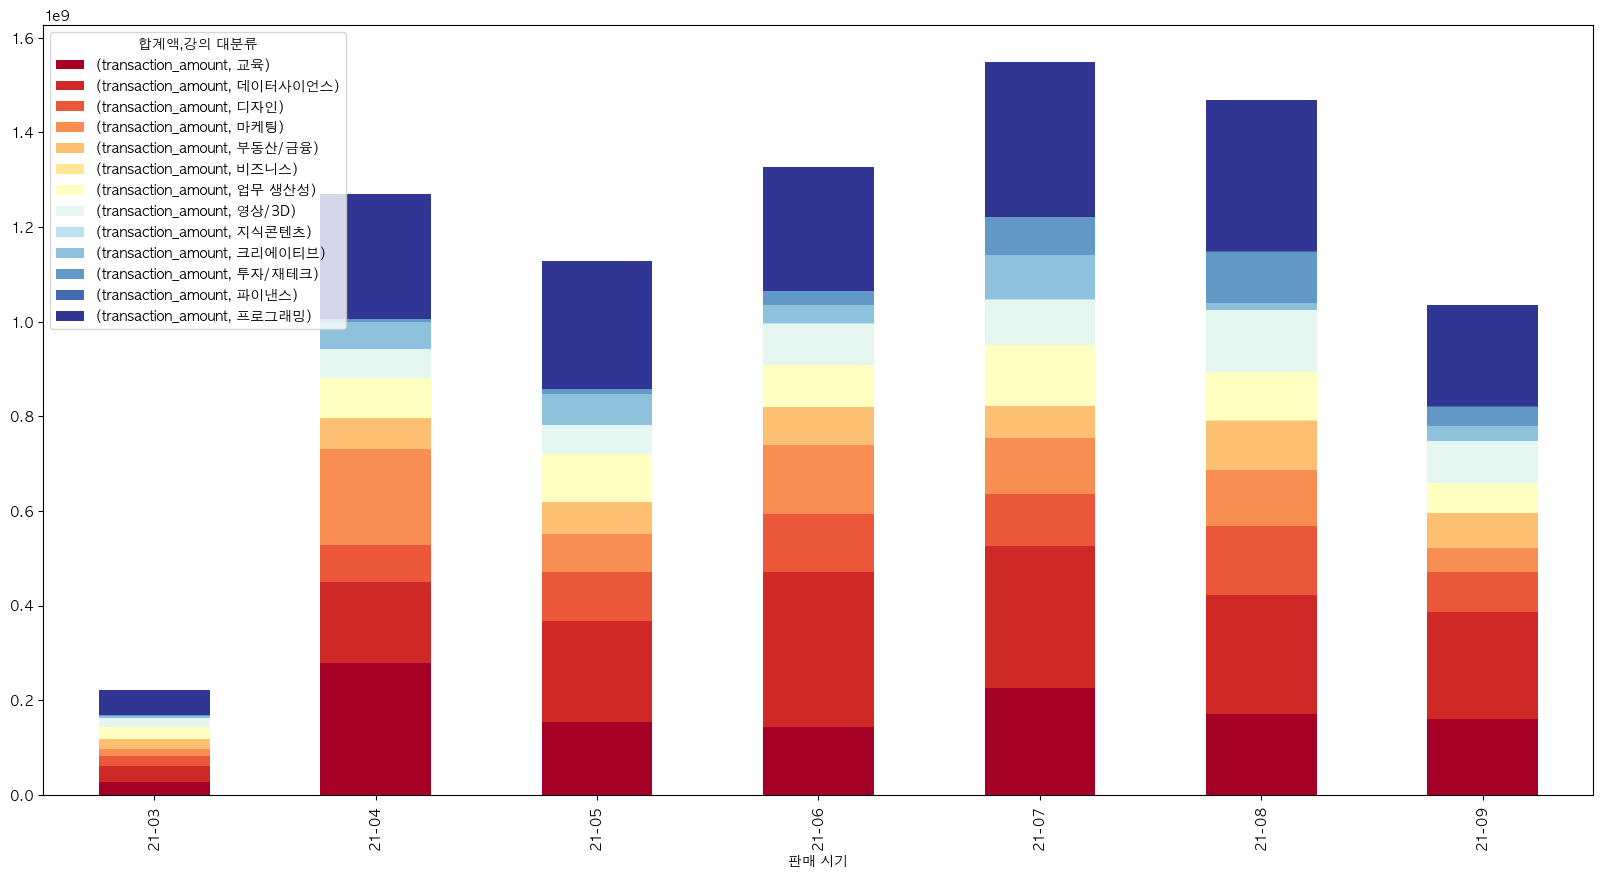

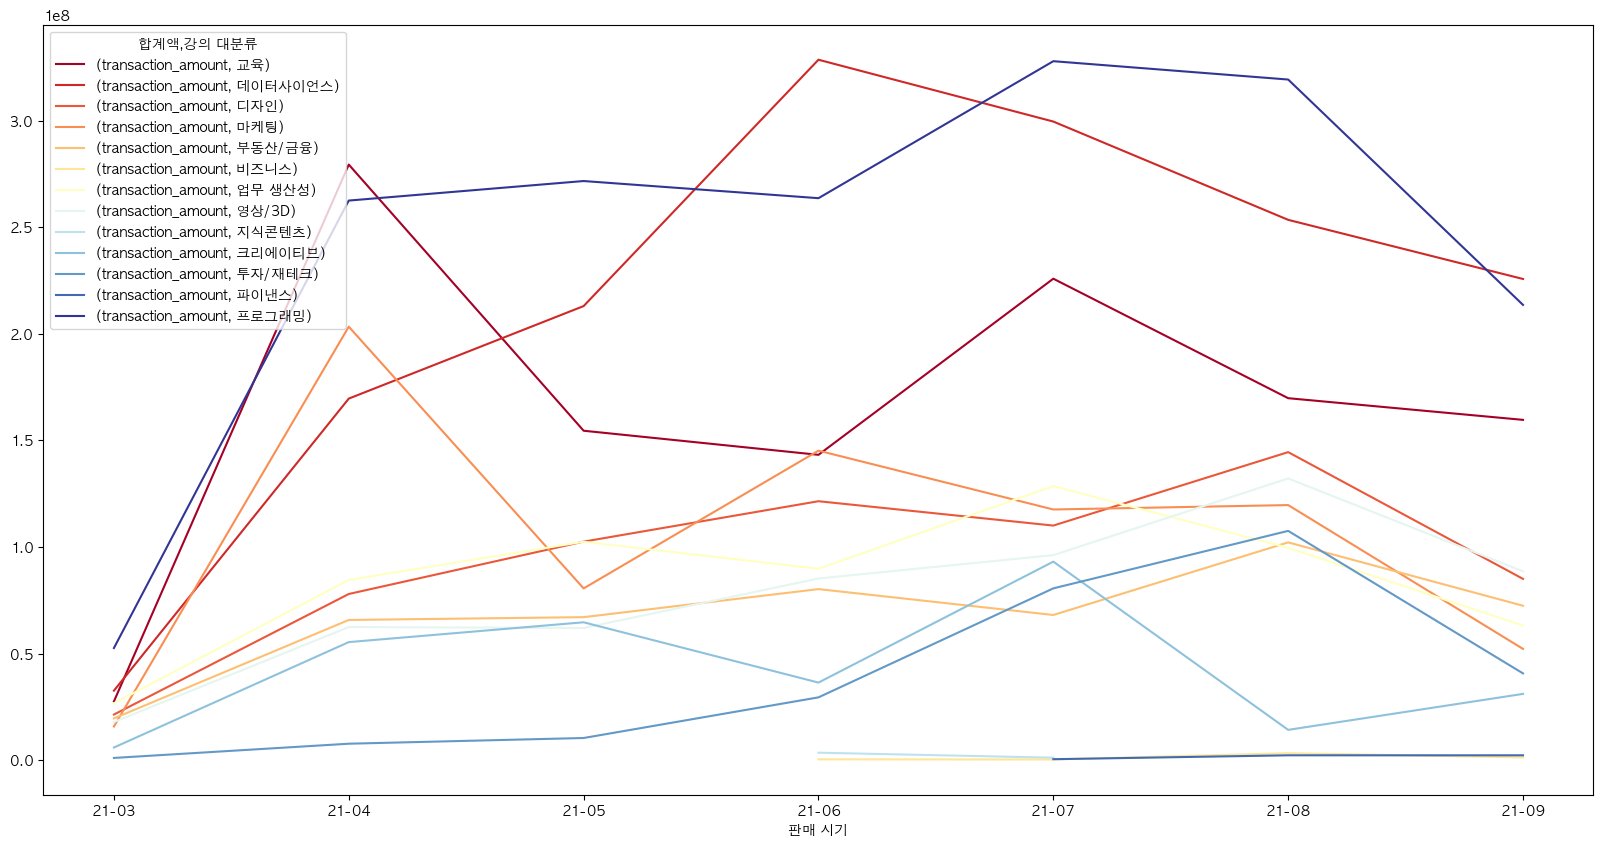

In [ ]:
SMC.plot(kind = 'bar', stacked = 'True', figsize=(20,10), colormap="RdYlBu")
SMC.plot(kind = 'line', figsize=(20,10), colormap="RdYlBu")
plt.show()

## 고객군별 마케팅 지출 비용 분석

### 선정 기준
- 원본 데이터의 `coupon_discount_amount` column의 존재를 통해 해당 할인 금액을 비용의 일종으로 간주  
→ 매출을 위해 소요한 마케팅 지출 비용을 파악해보자 하였음

In [ ]:
# 쿠폰 사용 금액이 0보다 큰 행들만 조회

cond1 = df1['coupon_discount_amount'] > 0
df2 = df1[cond1]
df2.head()

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,...,is_business,date,year,month,week,quarter,day_of_week,hour,고객군,sale_time
0,2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,...,0,2021-03-28 15:21:43,2021,3,12,1,Sunday,15,B2C,21-03
1,4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,...,1,2021-03-28 15:21:54,2021,3,12,1,Sunday,15,B2C,21-03
2,8,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,...,0,2021-03-28 15:26:47,2021,3,12,1,Sunday,15,B2C,21-03
4,14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,...,0,2021-03-28 15:31:01,2021,3,12,1,Sunday,15,B2C,21-03
7,28,970704,471759,204068,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,올인원,2021-03-28 15:46:22,...,0,2021-03-28 15:46:22,2021,3,12,1,Sunday,15,B2C,21-03


In [ ]:
# 판매가격에서 쿠폰가격 제외한 금액이 결제금액과 항상 일치하나?

cond_a = df1['sale_price'] - df1['coupon_discount_amount'] == df1['transaction_amount']
df1[cond_a].head()

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,...,is_business,date,year,month,week,quarter,day_of_week,hour,고객군,sale_time
0,2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,...,0,2021-03-28 15:21:43,2021,3,12,1,Sunday,15,B2C,21-03
1,4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,...,1,2021-03-28 15:21:54,2021,3,12,1,Sunday,15,B2C,21-03
2,8,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,...,0,2021-03-28 15:26:47,2021,3,12,1,Sunday,15,B2C,21-03
4,14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,...,0,2021-03-28 15:31:01,2021,3,12,1,Sunday,15,B2C,21-03
7,28,970704,471759,204068,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,올인원,2021-03-28 15:46:22,...,0,2021-03-28 15:46:22,2021,3,12,1,Sunday,15,B2C,21-03


In [ ]:
# 판매가격에서 쿠폰가격 제외한 금액이 결제금액과 일치하지 않는 경우도 있겠지

cond_b = df1['sale_price'] - df1['coupon_discount_amount'] != df1['transaction_amount']
df1[cond_b & cond1].head()

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,...,is_business,date,year,month,week,quarter,day_of_week,hour,고객군,sale_time
0,2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,...,0,2021-03-28 15:21:43,2021,3,12,1,Sunday,15,B2C,21-03
1,4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,...,1,2021-03-28 15:21:54,2021,3,12,1,Sunday,15,B2C,21-03
2,8,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,...,0,2021-03-28 15:26:47,2021,3,12,1,Sunday,15,B2C,21-03
4,14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,...,0,2021-03-28 15:31:01,2021,3,12,1,Sunday,15,B2C,21-03
7,28,970704,471759,204068,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,올인원,2021-03-28 15:46:22,...,0,2021-03-28 15:46:22,2021,3,12,1,Sunday,15,B2C,21-03


In [ ]:
# 어째서 일치하지 않는 경우가 발생하는 것인지 한 번 실례를 찾아서 생각해보자

df1[df1['customer_id']==569863]

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,...,is_business,date,year,month,week,quarter,day_of_week,hour,고객군,sale_time
30588,64903,1178860,569863,205707,PAYMENT,COMPLETED,올인원 패키지 : 15명의 전문 애널리스트에게 배우는 산업&매크로 분석과 투자 전략,투자/재테크,올인원,2021-06-30 14:06:39,...,0,2021-06-30 14:06:39,2021,6,26,2,Wednesday,14,B2C,21-06
51376,98199,1329552,569863,205648,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 금융ㆍ투자(IB) 실무,부동산/금융,올인원,2021-09-06 00:36:51,...,0,2021-09-06 00:36:51,2021,9,36,3,Monday,0,B2C,21-09


- 위와 같이, 1+1 등으로 인해 할인해주는 강의들의 경우, 판매가격에서 쿠폰가격 제외한 금액이 결제금액과 일치하지 않는 상황이 발생함을 파악.
- 따라서 `coupon_discount_amount` column 값이 0보다 큰 경우만 살펴봐도 될 것으로 판단

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23761 entries, 0 to 56722
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   23761 non-null  int64         
 1   id                      23761 non-null  int64         
 2   customer_id             23761 non-null  int64         
 3   course_id               23761 non-null  int64         
 4   type                    23761 non-null  object        
 5   state                   23761 non-null  object        
 6   course_title            23761 non-null  object        
 7   category_title          23761 non-null  object        
 8   format                  23761 non-null  object        
 9   completed_at            23761 non-null  datetime64[ns]
 10  transaction_amount      23761 non-null  int64         
 11  coupon_title            23761 non-null  object        
 12  coupon_discount_amount  23761 non-null  float6

### 고객군별 할인

In [ ]:
# 고객군별 할인

df_c = pd.pivot_table(data=df2, index=["고객군"], values=["coupon_discount_amount"], aggfunc=["count", "sum", "mean"])
df_c.columns = ['할인 건수', '할인 총액', '평균']
df_c

,할인 건수,할인 총액,평균
고객군,,,
B2C,23723,1295238465.00,54598.43
B2G,38,11100000.00,292105.26


- B2B의 경우, 쿠폰을 사용한 할인이 없음
- 대부분의 쿠폰 할인은 B2C에 적용되었음을 확인

### 월별 할인

In [ ]:
# 월별 할인

how1 = {
    'coupon_discount_amount':np.sum
}

df_S = df2.groupby(['sale_time']).agg(how1)
df_S = df_S.rename(columns={ 'coupon_discount_amount':'할인 합계액'})
df_S.index.names = ['판매 시기']
df_S

,할인 합계액
판매 시기,
21-03,94574960.00
21-04,294215660.00
21-05,130541440.00
21-06,160300555.00
21-07,99207500.00
21-08,267419000.00
21-09,260079350.00


In [ ]:
ST = df_S.index
SV= df_S.values.reshape(1,-1)[0]

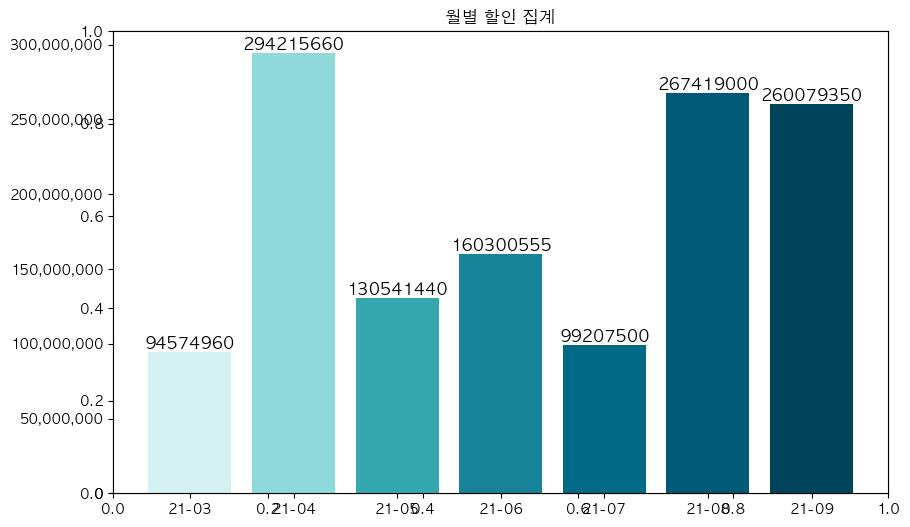

In [ ]:
fig1 = plt.figure(figsize=(10,6))

plt.title('월별 할인 집계')
ax1 = fig1.add_subplot(1, 1, 1)
bar1= plt.bar(ST, SV, color = ['#D3F1F0', '#8EDADA', '#35A7AF', '#168398', '#006A87', '#005977', '#00445C'])

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 12)

ax1.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

- 쿠폰 할인은 4월에 가장 많았으며, 그 외 8월과 9월에도 많이 적용되었음을 확인

#### 고객군별 월별 할인

In [ ]:
# 고객군별 월별 할인

df_BM_S = df2.groupby(['고객군', 'sale_time']).agg(how1)
df_BM_S = df_BM_S.rename(columns={'coupon_discount_amount':'할인 합계액'})
df_BM_S

할인 합계액
고객군 sale_time             
B2C 21-03      94574960.00
    21-04     294215660.00
    21-05     130541440.00
    21-06     160300555.00
    21-07      99207500.00
    21-08     259319000.00
    21-09     257079350.00
B2G 21-08       8100000.00
    21-09       3000000.00

In [ ]:
BMC = df_BM_S.index.get_level_values(0).drop_duplicates()
BMT = df_BM_S.index.get_level_values(1).drop_duplicates()
B2C_V= df_BM_S.loc['B2C'].values.reshape(1,-1)[0]
B2G_V= df_BM_S.loc['B2G'].values.reshape(1,-1)[0]
# B2G_V= np.append(np.array([0,0,0,0,0]), df_BM_S.loc['B2G'].values.reshape(1,-1)[0])

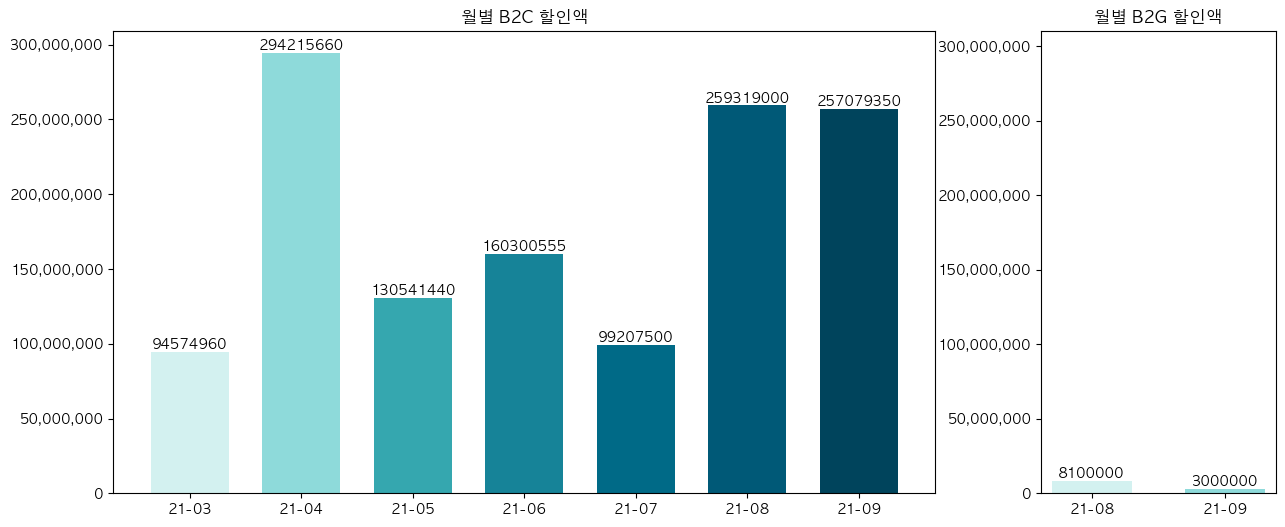

In [ ]:
fig3 = plt.figure(figsize=(15,6))

spec = grs.GridSpec(ncols=2, nrows=1,width_ratios=[7, 2])

ax6 = plt.subplot(spec[0])
plt.title("월별 B2C 할인액")
bar6 = plt.bar(BMT, B2C_V, width = 0.7, color = ['#D3F1F0', '#8EDADA', '#35A7AF', '#168398', '#006A87', '#005977', '#00445C'])

for rect in bar6:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 10)

ax6.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

ax7 = plt.subplot(spec[1])
plt.title("월별 B2G 할인액")
bar7 = plt.bar(BMT[5:7], B2G_V, width = 0.6, color = ['#D3F1F0', '#8EDADA', '#35A7AF', '#168398', '#006A87', '#005977', '#00445C'])
plt.ylim(0,310000000)

for rect in bar7:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 10)

ax7.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()


## Matplotlib 에서 다른 서브 플롯 크기를 만드는 방법 --> https://www.delftstack.com/ko/howto/matplotlib/how-to-make-different-subplot-sizes-in-matplotlib/

- 대부분의 쿠폰할인이 B2C에서 적용되었기에 전체 쿠폰할인 추이와 유사함을 확인

### 카테고리별 할인

In [ ]:
# 카테고리별 할인

df_C = df2.groupby(['category_title']).agg(how1)
df_C = df_C.rename(columns={'coupon_discount_amount':'할인 합계액'})
df_C.index.names = ['강의 대분류']
df_C

,할인 합계액
강의 대분류,
데이터사이언스,188960700.00
디자인,158532080.00
마케팅,96428760.00
부동산/금융,83458175.00
비즈니스,3735.00
업무 생산성,110213550.00
영상/3D,134878300.00
지식콘텐츠,229000.00
크리에이티브,9773200.00


In [ ]:
CT = df_C.index
CV = df_C.values.reshape(1,-1)[0]

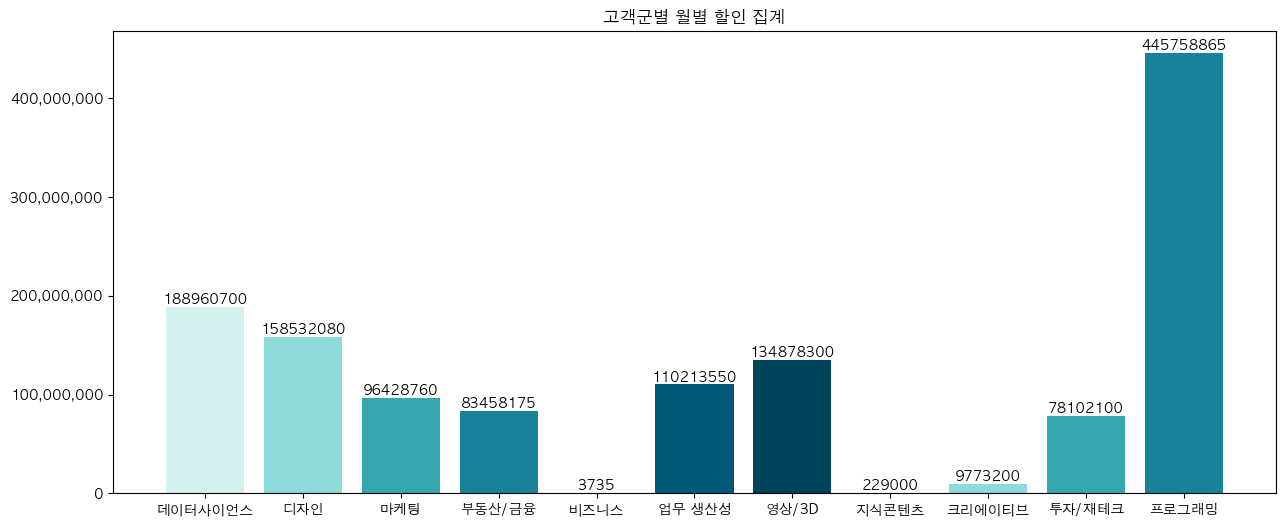

In [ ]:
fig4 = plt.figure(figsize=(15,6))

ax8 = fig4.add_subplot(1, 1, 1)
plt.title('고객군별 월별 할인 집계')
bar8 = plt.bar(CT, CV, color = ['#D3F1F0', '#8EDADA', '#35A7AF', '#168398', '#006A87', '#005977', '#00445C'])

ax8.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

for rect in bar8:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 10)

plt.show()

- 카테고리별 할인은 순서대로 프로그래밍, 데이터사이언스, 디자인이 Top 3을 형성
- 교육의 경우, 전체 매출이 B2B에서 발생하였기에 쿠폰 할인 내역에서는 제외되었음을 확인

#### 고객군별 카테고리별 할인

In [ ]:
# 고객군별 카테고리별 할인

df_BM_C = df2.groupby(['고객군', 'category_title']).agg(how1)
df_BM_C.index.names = ['고객군', '강의 대분류']
df_BM_C.columns=['매출 합계액']
df_BM_C

매출 합계액
고객군 강의 대분류              
B2C 데이터사이언스 188960700.00
    디자인     158532080.00
    마케팅      96428760.00
    부동산/금융   83458175.00
    비즈니스         3735.00
    업무 생산성  110213550.00
    영상/3D   134878300.00
    지식콘텐츠      229000.00
    크리에이티브    9773200.00
    투자/재테크   78102100.00
    프로그래밍   434658865.00
B2G 프로그래밍    11100000.00

In [ ]:
BMC = df_BM_C.index.get_level_values(0).drop_duplicates()
BMT = df_BM_C.index.get_level_values(1).drop_duplicates()
B2C_V= df_BM_C.loc['B2C'].values.reshape(1,-1)[0]
B2G_V= df_BM_C.loc['B2G'].values.reshape(1,-1)[0]
# B2G_V= np.append(np.array([0] * 10, df_BM_C.loc['B2G'].values.reshape(1,-1)[0])

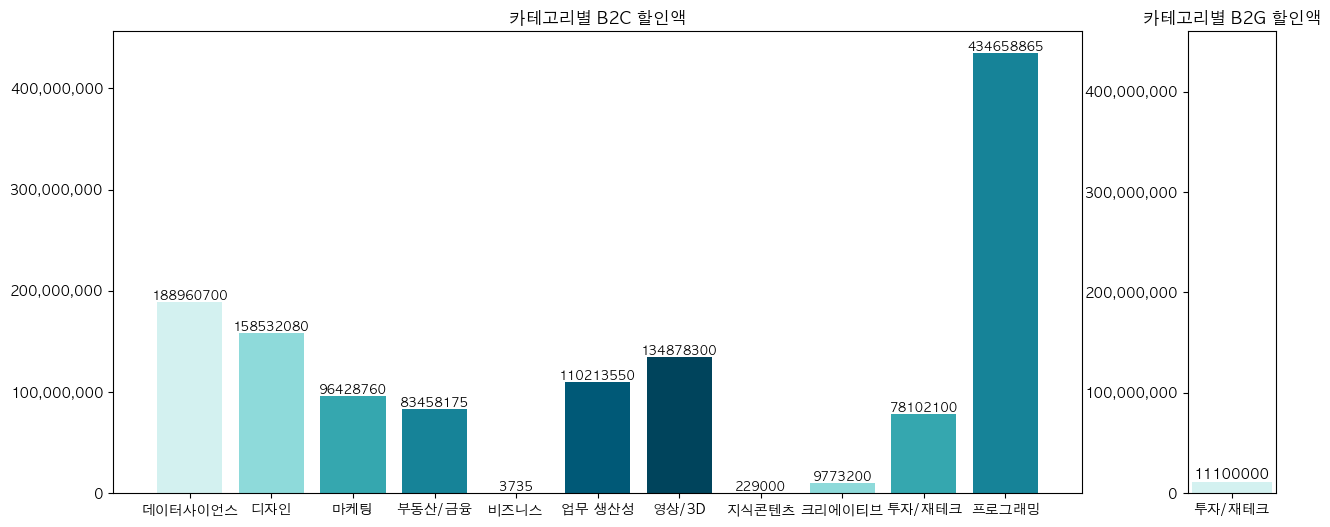

In [ ]:
fig5 = plt.figure(figsize=(15,6))

spec = grs.GridSpec(ncols=2, nrows=1,width_ratios=[11, 1])

ax10 = fig5.add_subplot(spec[0])
plt.title("카테고리별 B2C 할인액")
# plt.plot(df_BM_C.loc['B2C'], color = '#168398')
bar10 = plt.bar(BMT, B2C_V,  color = ['#D3F1F0', '#8EDADA', '#35A7AF', '#168398', '#006A87', '#005977', '#00445C'])

for rect in bar10:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 9)

ax10.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

ax11 = fig5.add_subplot(spec[1])
plt.title("카테고리별 B2G 할인액")
bar11 = plt.bar(BMT[9], B2G_V, color = ['#D3F1F0', '#8EDADA', '#35A7AF', '#168398', '#006A87', '#005977', '#00445C'])
plt.ylim(0,460000000,100000000)

for rect in bar11:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 10)

ax11.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

- 대부분의 쿠폰할인이 B2C에서 적용되었기에 전체 쿠폰할인 추이와 유사함을 확인